<a href="https://colab.research.google.com/github/Ashirbad23/Stroke_Prediction_Machine_Learning-Classification-/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Essentials

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV


In [130]:
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning_Datasets/Stroke Prediction/healthcare-dataset-stroke-data.csv")

# Data Cleaning

In [131]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [132]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [133]:
df.duplicated().sum()

0

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [135]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [136]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [137]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [138]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [140]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [141]:
df.loc[(df['age']<18) & (df["work_type"]!='children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
284,26325,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0
288,70970,Female,17.0,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0
395,23462,Female,17.0,0,0,No,Private,Urban,87.52,39.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4950,66650,Female,17.0,0,0,No,Private,Urban,68.86,41.1,never smoked,0
4981,61801,Male,15.0,0,0,No,Private,Urban,65.05,24.6,Unknown,0
5003,63158,Male,17.0,0,0,No,Private,Urban,63.28,40.2,Unknown,0
5004,27435,Female,17.0,0,0,No,Private,Urban,82.64,31.1,Unknown,0


In [142]:
df.loc[((df['age']<18) & (df["work_type"]!='children')), 'work_type'] = 'children'

In [146]:
df.loc[((df['age']<18) & (df["work_type"]!='children')), 'work_type'].sum()

0

In [173]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Data Visualisations and Analysis

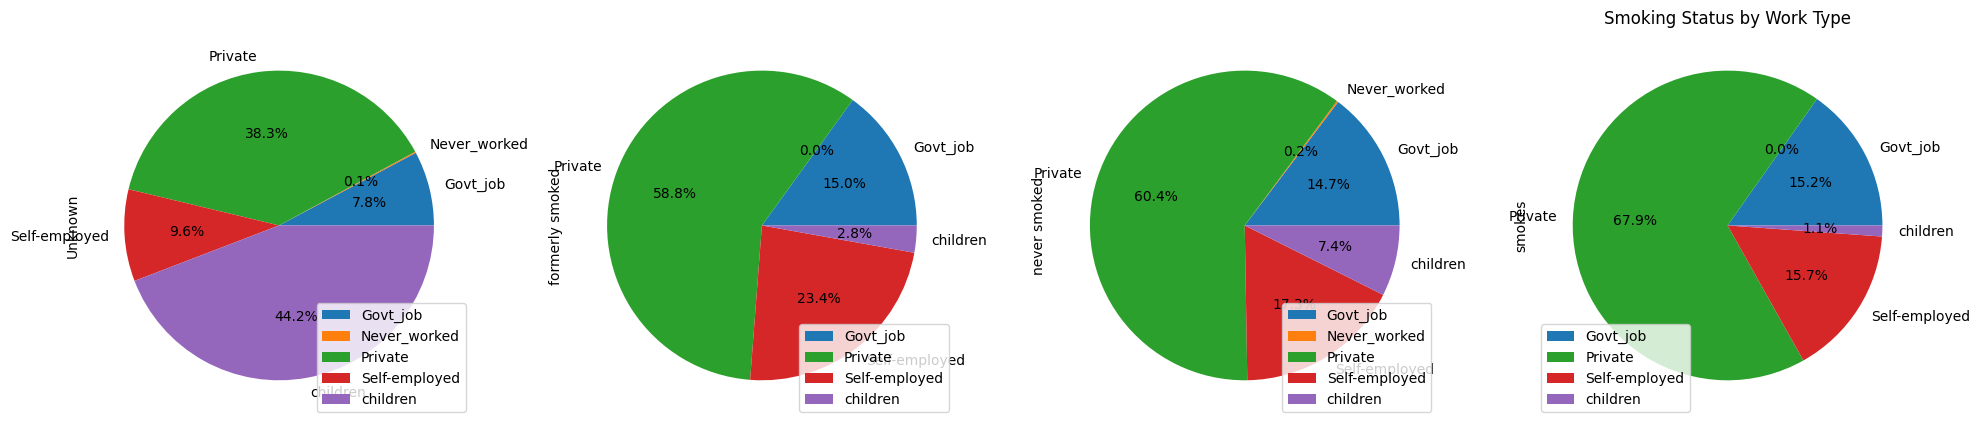

In [204]:
df_grouped = df.groupby(['work_type', 'smoking_status']).size().unstack()
df_grouped.plot(kind='pie', subplots=True, figsize=(20, 20), autopct='%1.1f%%')
plt.title('Smoking Status by Work Type')
plt.tight_layout()

Text(0.5, 1.0, 'Average Glucose Level by Gender')

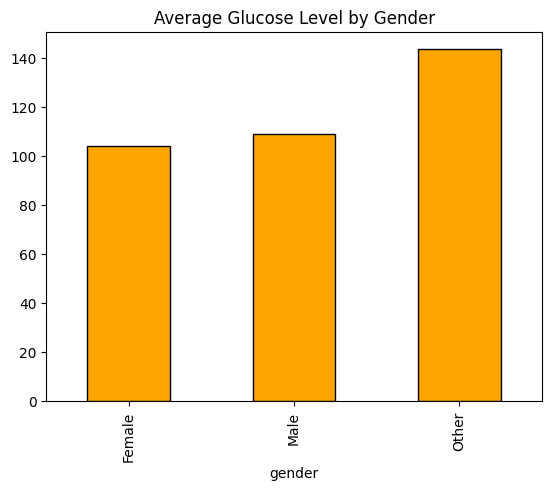

In [189]:
df.groupby('gender')['avg_glucose_level'].mean().plot(kind='bar', color='orange', ec='black')
plt.title('Average Glucose Level by Gender')

Text(0.5, 1.0, 'Prevalence of hypertension by age')

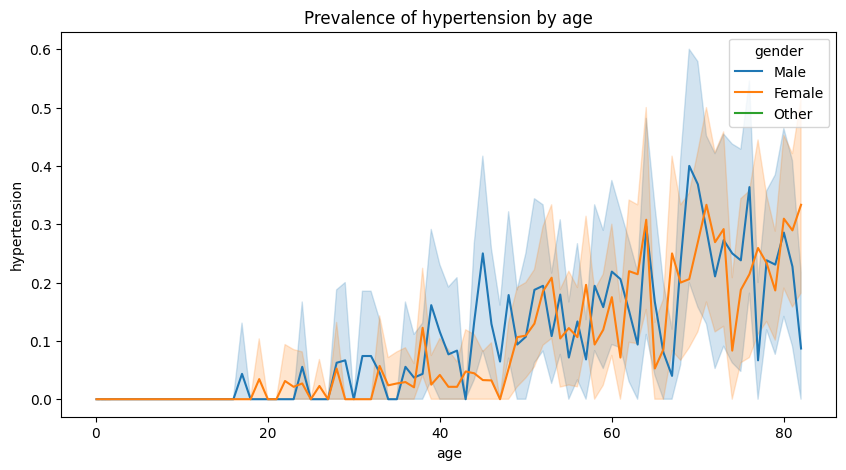

In [179]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='age', y='hypertension', hue='gender')
plt.title('Prevalence of hypertension by age')

stroke
0    4861
1     249
Name: count, dtype: int64


Text(0.5, 1.0, 'Stroke count analysis')

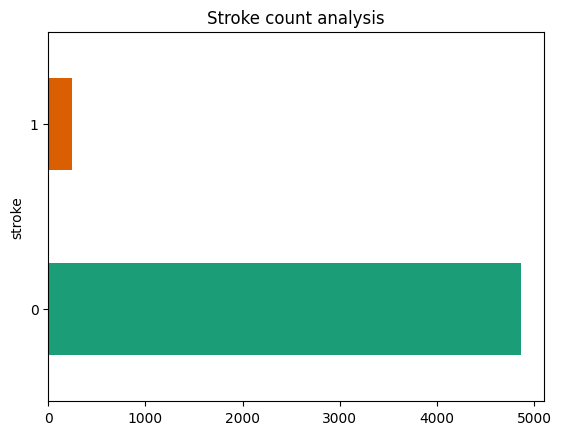

In [185]:
print(df['stroke'].value_counts())
df.groupby('stroke').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Stroke count analysis')

## Histogram Plot
Histogram plot to visualize
- Gender ratio
- Marital Status
- Work Type
- Residense Type<br />
And the relation with Brain Stroke incidence


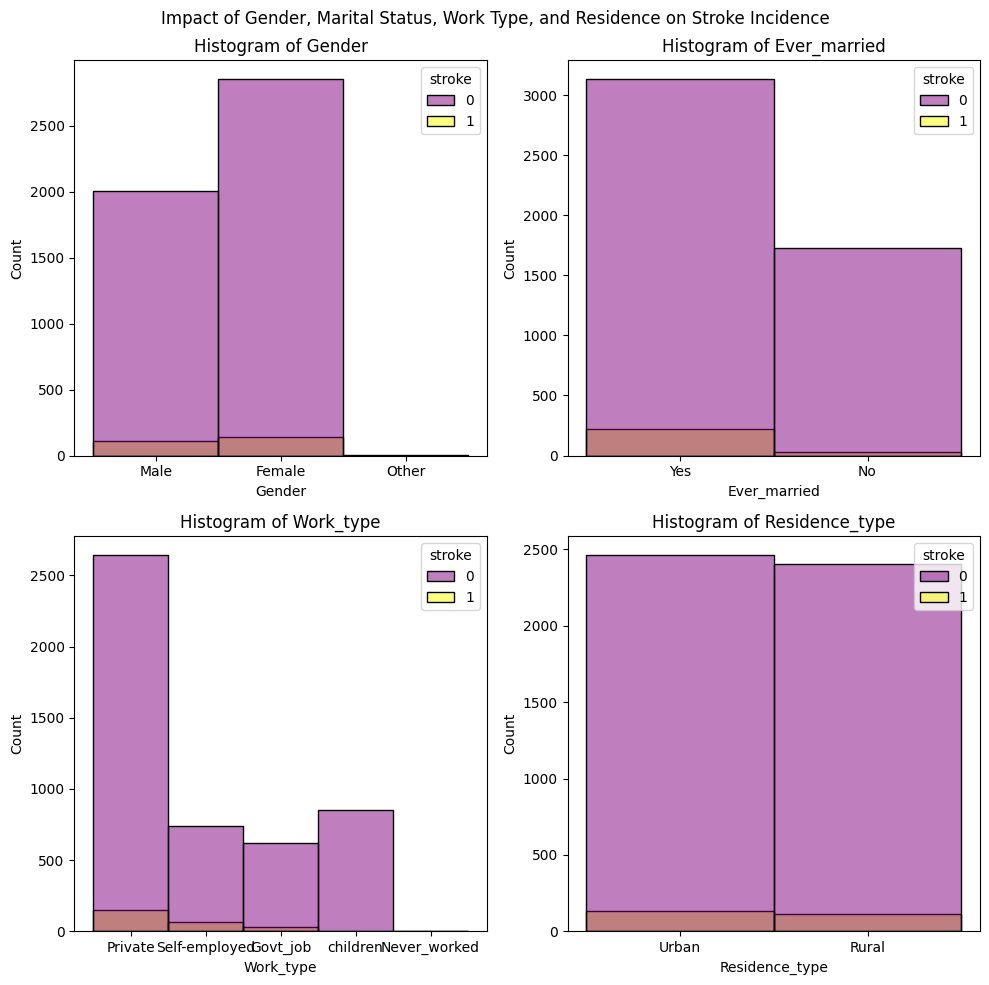

In [181]:
neutral_col = ["gender", "ever_married", "work_type", "Residence_type"]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ele, ax in zip(neutral_col, axs.ravel()):
  sns.histplot(df, x=ele, hue='stroke', ax=ax, bins=df[ele].unique().sum(), palette=['purple', 'yellow'])
  ax.set_xlabel(ele.capitalize())
  ax.set_title(f'Histogram of {ele.capitalize()}')  # Set title for each subplot

plt.suptitle('Impact of Gender, Marital Status, Work Type, and Residence on Stroke Incidence')  # Set main title
plt.tight_layout()


In [149]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Histogram plot to visualize
- Age gap
- Hypertension
- Heart Disease
- Average Glucose Level
- Body Mass Index
- Smoking Status<br />
And the relation with Brain Stroke incidence

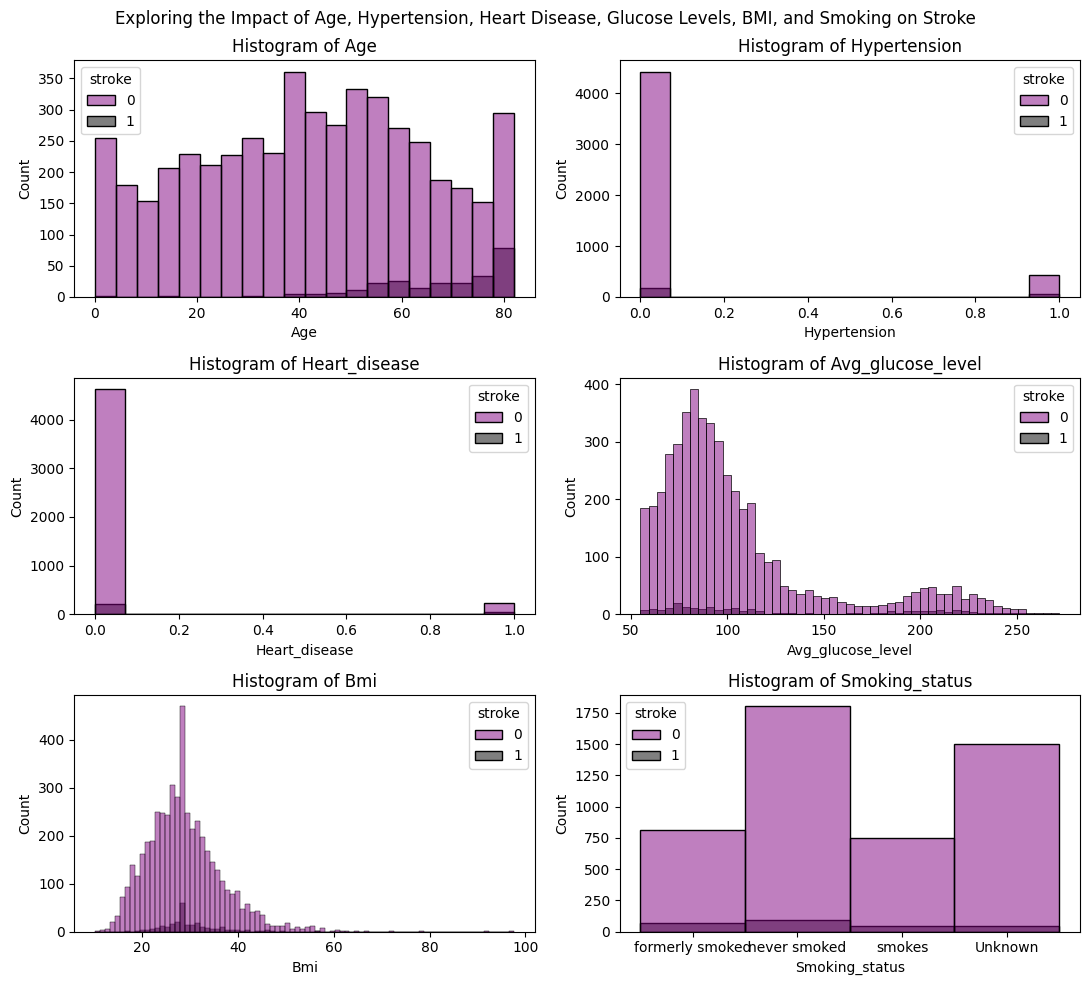

In [182]:
effective_col = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']
figs, axs = plt.subplots(3, 2, figsize=(11, 10))
for ele, ax in zip(effective_col, axs.ravel()):
  sns.histplot(df, x=ele, ax=ax, palette=['purple', 'black'], hue='stroke')
  ax.set_xlabel(ele.capitalize())
  ax.set_title(f'Histogram of {ele.capitalize()}')  # Set title for each subplot

plt.suptitle('Exploring the Impact of Age, Hypertension, Heart Disease, Glucose Levels, BMI, and Smoking on Stroke')  # Set main title
plt.tight_layout()


Text(0.5, 1.0, 'Pairplot to see relation between all parameters')

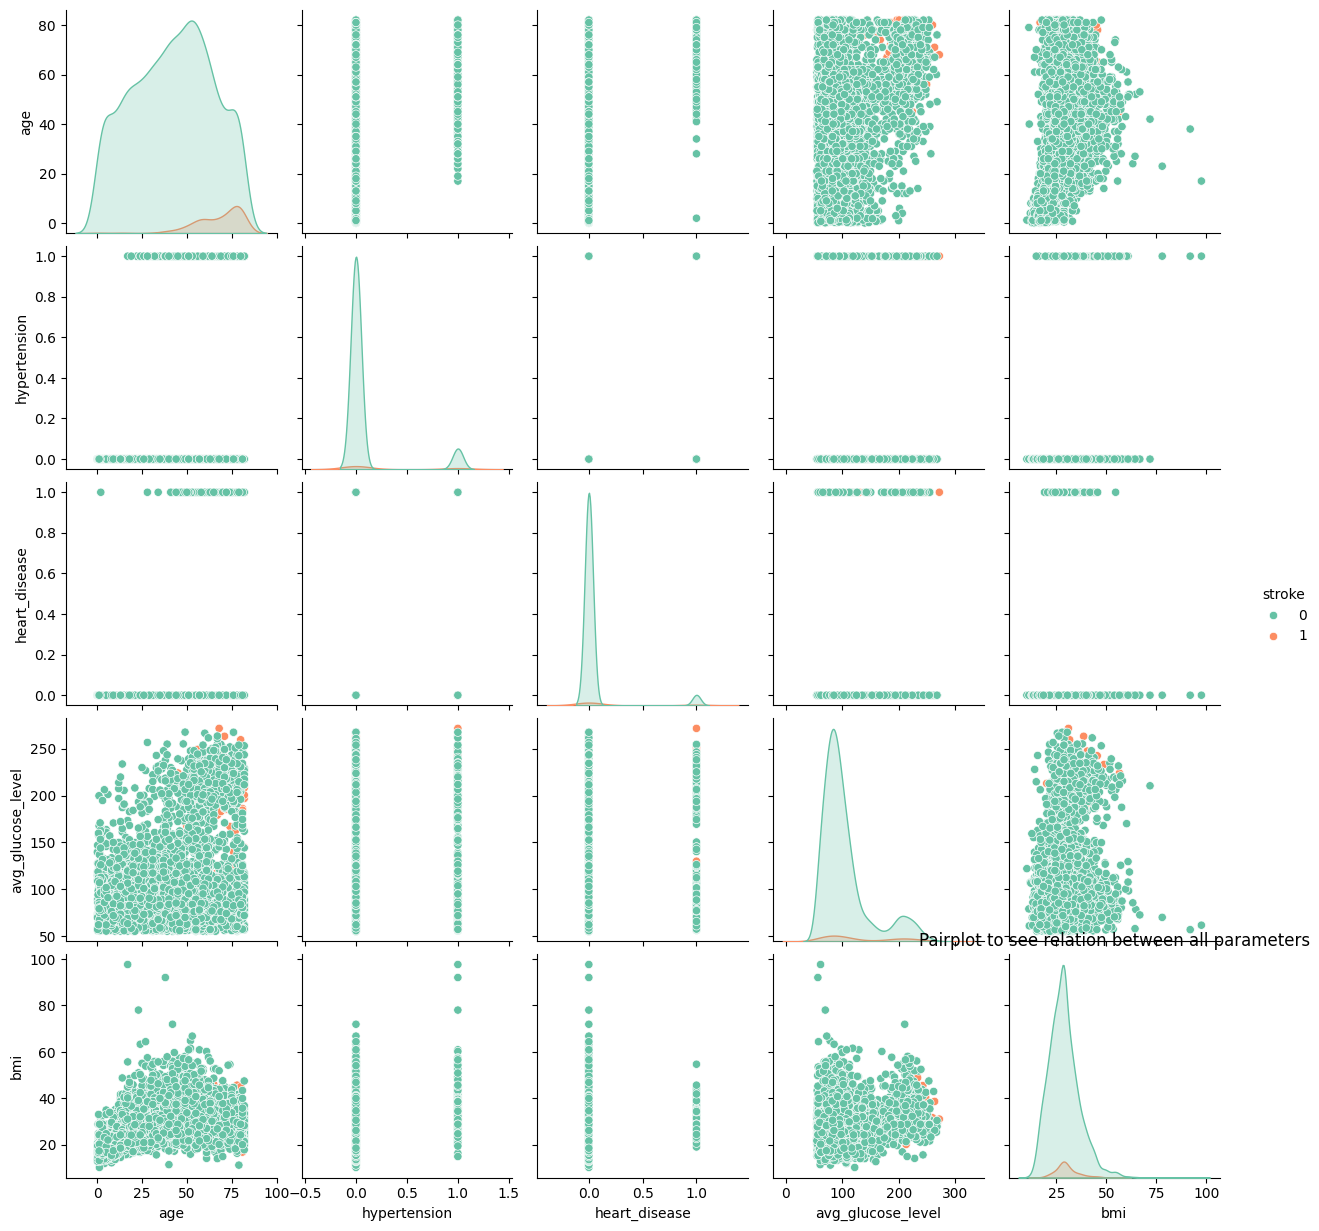

In [206]:
sns.pairplot(df.drop(columns=['id']), hue='stroke', palette='Set2')
plt.title("Pairplot to see relation between all parameters")

In [152]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Data Preprocessing and Feature Cereation


In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [154]:
df1 = df.copy()

In [155]:
gender_dummies = pd.get_dummies(df1.gender).astype('int64')
gender_dummies.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [156]:
df1 = pd.concat([df1, gender_dummies.drop('Other', axis='columns')], axis='columns')
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,0


In [157]:
df2 = df1.drop(columns=['id', 'gender'])
df2.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,0
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,0


In [158]:
df2.work_type.value_counts()

work_type
Private          2791
children          856
Self-employed     807
Govt_job          651
Never_worked        5
Name: count, dtype: int64

In [159]:
work_type_dummies = pd.get_dummies(df2.work_type).astype('int64')
work_type_dummies.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [160]:
df2 = pd.concat([df2, work_type_dummies.drop('Never_worked', axis='columns')], axis='columns')
df2.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Private,Self-employed,children
0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,1,0,1,0,0
1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,0,0,0,1,0
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1,0,1,0,0
3,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0,0,1,0,0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,0,0,0,1,0


In [161]:
df3 = df2.drop('work_type', axis='columns')
df3.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Private,Self-employed,children
0,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,0,1,0,1,0,0
1,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,1,0,0,0,1,0
2,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,0,1,0,1,0,0
3,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,1,0,0,1,0,0
4,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,1,0,0,0,1,0


In [162]:
df3.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [163]:
smoking_status_dummies = pd.get_dummies(df['smoking_status']).astype('int64')
smoking_status_dummies.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [164]:
df3 = pd.concat([df3, smoking_status_dummies.drop('Unknown', axis='columns')], axis='columns')
df3.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,1,0,0,0,1,0,0,1,0
2,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,1,0,0,0,1,0,0,1,0


In [165]:
df4 = df3.drop('smoking_status', axis='columns')
df4.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,Yes,Urban,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,Yes,Rural,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
2,80.0,0,1,Yes,Rural,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,Yes,Urban,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,Yes,Rural,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


In [167]:
df5=df4.copy()

In [168]:
df5['ever_married'] = df4['ever_married'].apply(lambda x: 1 if x=='Yes' else 0)
df5.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,1,Urban,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,1,Rural,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
2,80.0,0,1,1,Rural,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,1,Urban,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,1,Rural,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


In [170]:
df5.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [171]:
df6 = df5.copy()

In [172]:
df6['Residence_type'] = df6['Residence_type'].apply(lambda x: 1 if x=='Urban' else 0)
df6.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


# Machine Learning Model Buliding

Input and Output selection

In [212]:
X = df6.drop('stroke', axis='columns')
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,1,1,228.69,36.600000,0,1,0,1,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,0,1,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,1,0


In [213]:
y = df6['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [216]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'Female', 'Male',
       'Govt_job', 'Private', 'Self-employed', 'children', 'formerly smoked',
       'never smoked', 'smokes'],
      dtype='object')

# Logistic Regression Model

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3934, 16) (3934,) (1176, 16) (1176,)


In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model_log = LogisticRegression(solver='sag')
model_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [255]:
model_log.score(X_test, y_test)

0.9506802721088435

In [256]:
confusion_matrix(y_test, model_log.predict(X_test))

array([[1118,    3],
       [  55,    0]])

In [257]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.23, random_state=0)
cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=cv)

array([0.94812925, 0.94897959, 0.95408163, 0.95493197, 0.94982993])

In [258]:
model_log.predict([[61.0, 0, 0, 1, 0, 202.21, 28.893237, 1, 0, 0, 0, 1, 0, 0, 1, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## Random Forest Model

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model_forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
model_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [260]:
model_forest.score(X_test, y_test)

0.9506802721088435

In [261]:
confusion_matrix(y_test, model_forest.predict(X_test))

array([[1118,    3],
       [  55,    0]])

In [262]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.23, random_state=0)
cross_val_score(RandomForestClassifier(n_estimators=10, criterion='entropy'), X, y, cv=cv)

array([0.94557823, 0.94302721, 0.94982993, 0.95238095, 0.94727891])

In [263]:
model_forest.predict([[67.0, 0, 1, 1, 1, 228.69, 36.6, 0, 1, 0, 1, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## Testing With Sample Data


In [265]:
X_test.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Govt_job,Private,Self-employed,children,formerly smoked,never smoked,smokes
4658,55.0,0,0,1,1,99.44,25.0,1,0,1,0,0,0,1,0,0
4105,56.0,0,0,0,1,128.63,24.9,1,0,0,0,1,0,0,0,1
1423,56.0,1,0,1,1,102.37,35.6,0,1,0,1,0,0,0,1,0
390,34.0,0,0,1,1,80.81,33.2,0,1,0,1,0,0,0,1,0
3148,78.0,0,0,1,1,201.58,30.6,0,1,0,0,1,0,0,0,0


In [266]:
y_test.head()

4658    0
4105    0
1423    0
390     0
3148    0
Name: stroke, dtype: int64

In [273]:
model_log.predict(X_test.iloc[[2]])

array([0])

In [274]:
model_forest.predict(X_test.iloc[[2]])

array([0])